In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import filters
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score, precision_score, f1_score

from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('/home/mattia/Projects/corino/dd/noise_labels.csv')
data = np.load('/home/mattia/Projects/corino/dd/Data2/data.npy')

In [3]:
y = df['label'].tolist()
y = [1 if l=='negative' else 0 for l in y]

# Negative Images

(-0.5, 255.5, 255.5, -0.5)

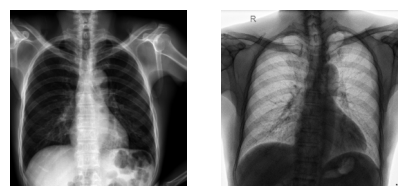

In [5]:
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.imshow(data[1],cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(data[6],cmap='gray')
plt.axis('off')

# Otsu thr

In [6]:
def otsu(img_dataset):
    
    dataset_filtered = np.zeros((len(img_dataset), 256, 256), dtype='uint8')

    for i in range(len(dataset_filtered)):
        th = filters.threshold_otsu(img_dataset[i])
        dataset_filtered[i, :, :] = (img_dataset[i] > th)

    return dataset_filtered

In [7]:
thr_data = otsu(data)

(-0.5, 255.5, 255.5, -0.5)

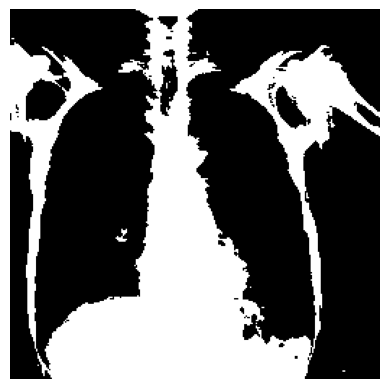

In [8]:
plt.imshow(thr_data[1], cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

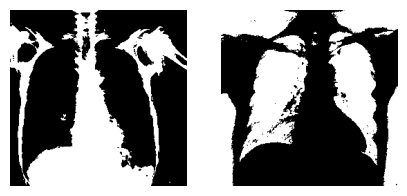

In [9]:
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.imshow(thr_data[1],cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(thr_data[6],cmap='gray')
plt.axis('off')

# Middle rect strategy

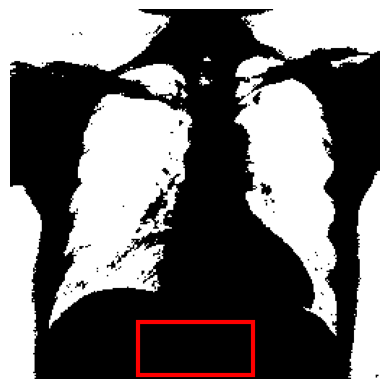

In [11]:
img = thr_data[6]
plt.imshow(img, cmap = 'gray')
plt.axis('off')

ax = plt.gca()
rect = Rectangle((128-40, 216), 80, 37, linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.savefig('ROI.jpeg')

# Split

In [15]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    roi_crop, y, test_size=0.30, random_state=42, stratify=y)


In [24]:
X_train.shape

(10829, 40, 80)

In [41]:
X_test.shape

(4641, 40, 80)

# Predict

In [25]:
def predict(roi_crop):

    sum_roi_crop = np.sum(roi_crop, axis = (1, 2))
    ratio_roi_crop = sum_roi_crop/(roi_crop.shape[1]*roi_crop.shape[2])

    return 1-ratio_roi_crop

In [26]:
predictions = predict(X_train)

In [30]:
prec = []
rec = []
f1 = []

thrs = np.arange(0,1,0.01)
for i in thrs:
    prec.append(precision_score(y_train,predictions>=i))
    rec.append(recall_score(y_train,predictions>=i))
    f1.append(f1_score(y_train,predictions>=i))

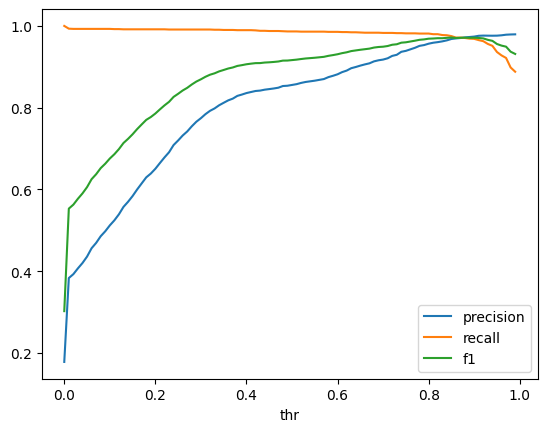

In [31]:
plt.plot(thrs, prec, label='precision')
plt.plot(thrs, rec, label='recall')
plt.plot(thrs, f1, label='f1')
plt.xlabel('thr')
plt.legend()

In [46]:
thrs[prec.index(max(prec))]

0.99

In [47]:
thrs[f1.index(max(f1))]

0.85

In [48]:
thrs[rec.index(max(rec))]

0.0

# Evaluate

In [36]:
def print_evaluation(y_true, predictions):
    cm = confusion_matrix(y_true, predictions)
    cm_display = ConfusionMatrixDisplay(cm, display_labels = ['normal', 'negative'])
    cm_display.plot()
    
    print(classification_report(y_true, predictions, digits=4))

In [37]:
predictions = predict(X_test)

              precision    recall  f1-score   support

           0     0.9766    0.9963    0.9864      3815
           1     0.9813    0.8898    0.9333       826

    accuracy                         0.9774      4641
   macro avg     0.9790    0.9431    0.9599      4641
weighted avg     0.9775    0.9774    0.9769      4641



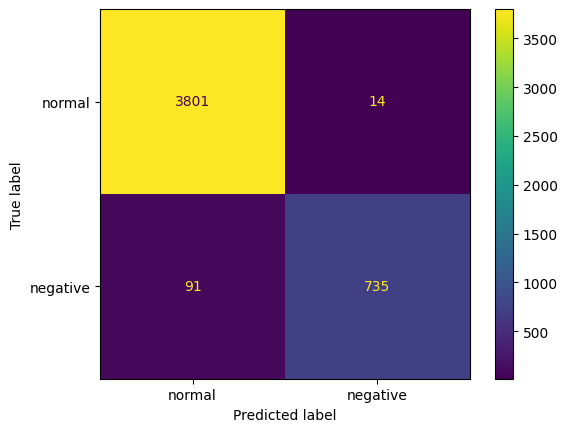

In [51]:
print_evaluation(y_test, predictions>=0.99)

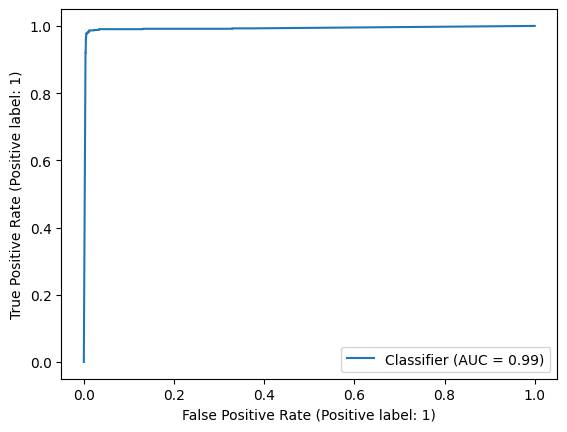

In [39]:
RocCurveDisplay.from_predictions(y_test,predictions)

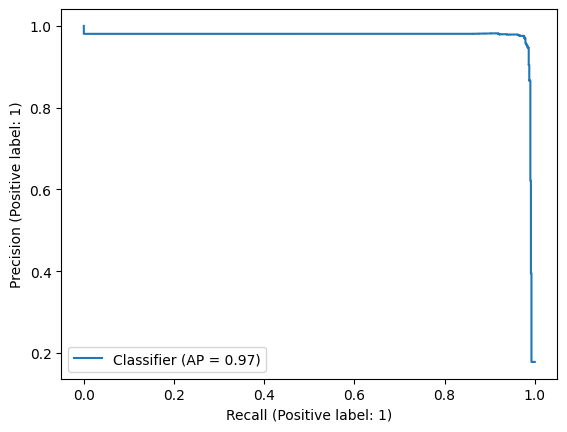

In [40]:
PrecisionRecallDisplay.from_predictions(y_test,predictions)